#  INDEPTH MASTERY OF  RANDOM FOREST  ALGORITHM

## Problem statement 
 below is a dataset that we will be using to predict the price of insurance we will be explaining the columns shortly 

 ### In the below model we wil be looking at the insurance prices one  pays to an insurance company(value of premiums)  .A health insurance is based in some several factors  . In the foollowing dataset the factors include :
1.Age - Ba sed on the age of the customer we can be able to determine the value of premiums one will pay in normal scenario the older one is the higher the premium rate is likely to be.

2.Sex - Based on sex we can be able to determine the amount one will indeed pay as premiums  .Will one pay more as a male while compared to a female? we will answer this question when we plot a correlation matrix and feature importance plot. 

3.BMI - BMI (Body Mass Index) is a commonly used measure to assess a person's 
  weight status and is calculated using the following formula:

  BMI = weight / (height^2)

  where weight is in kilograms and height is in meters. BMI is a numerical value that provides an indication of whether a person   is underweight, normal weight, overweight, or obese.

  The BMI categories are generally defined as follows:

  Underweight: BMI < 18.5
  Normal weight: 18.5 <= BMI < 25
  Overweight: 25 <= BMI < 30
  Obese: BMI >= 30 .


4 .Number of children - based on the number of children we can be able do determine whether one will pay higher premiumns or not   which ideally is the case.

5 Region - We will look where each customer comes from and based on region one comes from can we really  predict the  amount     one will pay as premiums? we wil se shortly whether the region one comes from really affects the insurance premium

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# The code below is used for splitting the dataset into 2.One for Training the model and the other for testing its perfomance
from sklearn.model_selection import train_test_split
# The model name as written is Linear regression
from sklearn.linear_model import LinearRegression

# The module below provides a range of metrics used for evaluating the perfomance of the model
from sklearn import metrics

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as mse

In [2]:
#We will  then load the dataset
df =pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## We will perfom the EDA 

In [3]:
#We will be lookinng for null values 
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


c:\Users\stilinski\Downloads\mlmodels\venv\lib\site-packages\ipykernel_launcher.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """


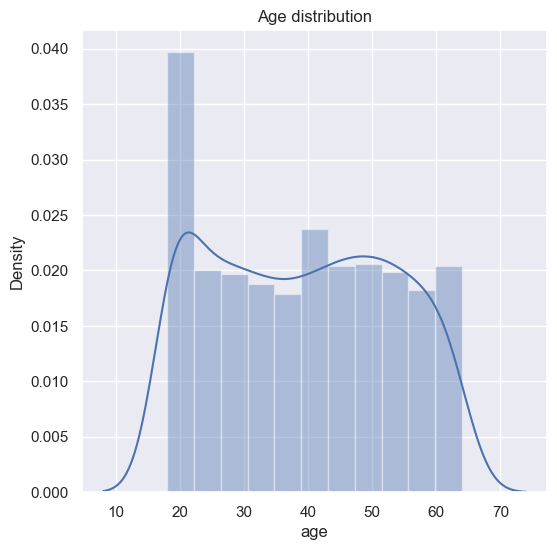

In [5]:
# below we will be looking for the age distribution using a distplot

sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title('Age distribution')
plt.show()

###  well our  customers age is not skewed to any direction ad is distributed almost fairly more young people are insuring thats for sure and mid 40's and also 60's

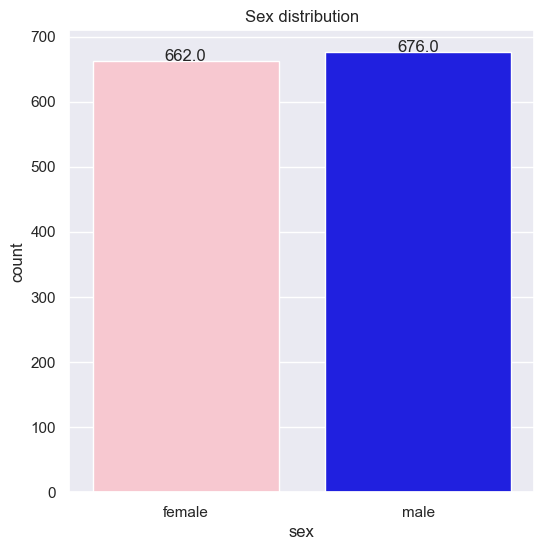

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6))

# Set the color palette for the countplot
colors = {'female': 'pink', 'male': 'blue'}
sns.set_palette(colors.values())

ax = sns.countplot(x='sex', data=df)
plt.title('Sex distribution')

# Add the count values as text on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, height, ha="center")

plt.show()

###  In the above plot we can really see that more male are taking insurance covers than their feamle counterparts

c:\Users\stilinski\Downloads\mlmodels\venv\lib\site-packages\ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


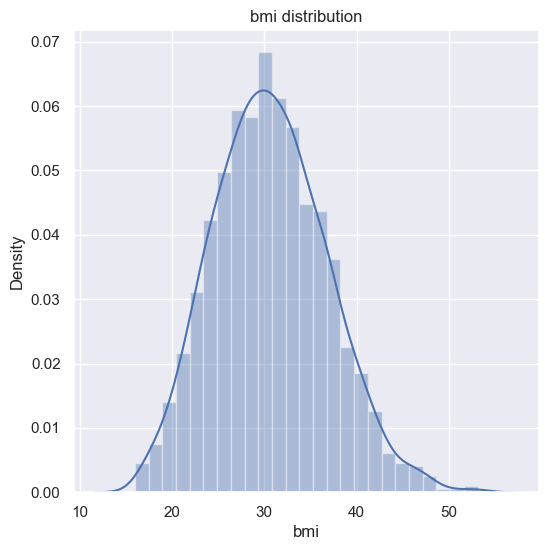

In [7]:

sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['bmi'])
plt.title('bmi distribution')
plt.show()

###  Our customers bmi is mainly from 25 to oround 38  from the information i gave above while discussing the problem statement is that from 25 -30 they are overweight  and past 30 they are obese thus most of our patients are taking  insurance cover beacuse they are not in good sahape and some may have more fears  and we can outrightly predict that a higher obese would actually attract a higher premium rate charge

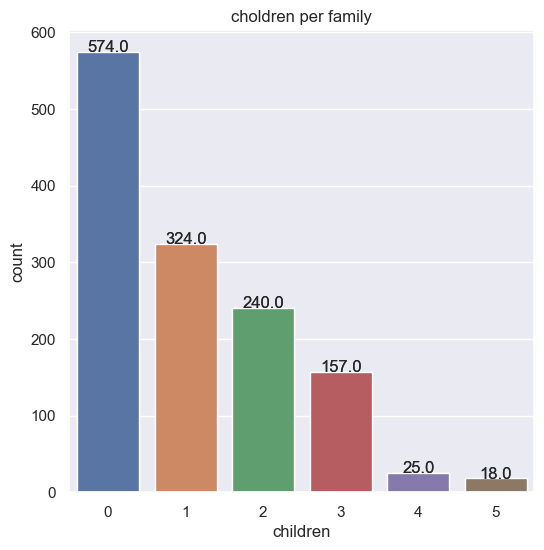

In [8]:
#in the code below we will be looking for the value of each count of each family and number of children using a countplot
plt.figure(figsize =(6,6))
sns.countplot(x='children',data=df)
plt.title('choldren per family')
ax = sns.countplot(x='children', data=df)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, height, ha="center")

plt.show()

###  Most  patients are childless and this could be brought about by some could still be single thus as we looked before we saw that most people are in thie twenties .

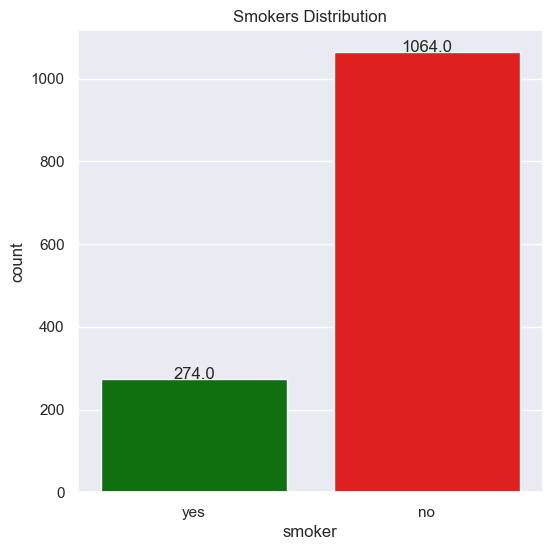

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6))

# Set the color palette for the countplot
colors = {'yes': 'green', 'no': 'red'}
sns.set_palette(colors.values())

ax = sns.countplot(x='smoker', data=df)
plt.title('Smokers Distribution')

# Add the count values as text on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, height, ha="center")

plt.show()

### In the above plot we have the distribution of smokers though not by sex but we apparently have less smokers. Thus by default a smoker has a higher risk of diseases and thus we expect the insurance premiums to be higher

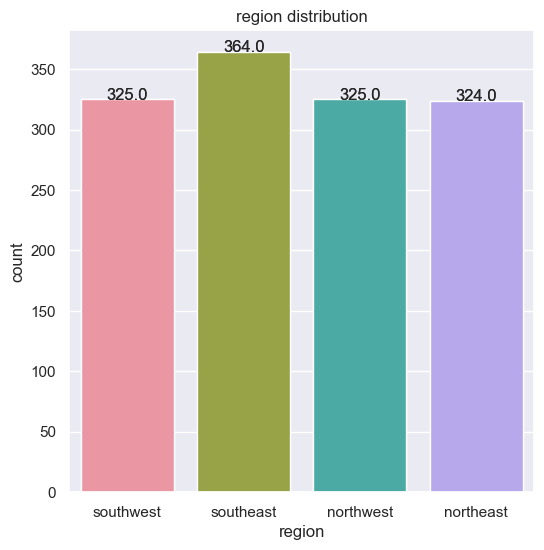

In [10]:
# Below we willl be looking for a count  of the values from each region using a countplot

plt.figure(figsize =(6,6))
sns.countplot(x='region',data=df)
plt.title('region distribution')
ax = sns.countplot(x='region', data=df)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, height, ha="center")

plt.show()

c:\Users\stilinski\Downloads\mlmodels\venv\lib\site-packages\ipykernel_launcher.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """


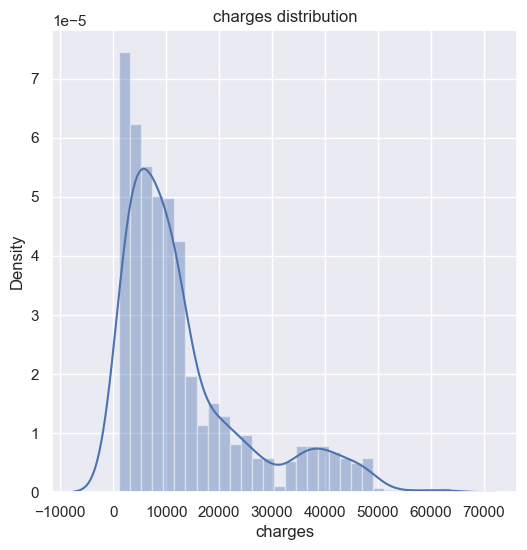

In [11]:
#below we will be looking for the charges distribution using  a distplot

sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['charges'])
plt.title('charges distribution')
plt.show()

### The charges distributiion are left skewed thus the insurance cost is generally lower and this may also be a  factor ( its affordable)

### since models dont actually understand non-numeric data we will encode our data and change it to numeric form

In [12]:
df.replace({'sex':{'male':0,'female':1}},inplace=True)
df.replace({'smoker':{'yes':0,'no':1}},inplace=True)
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

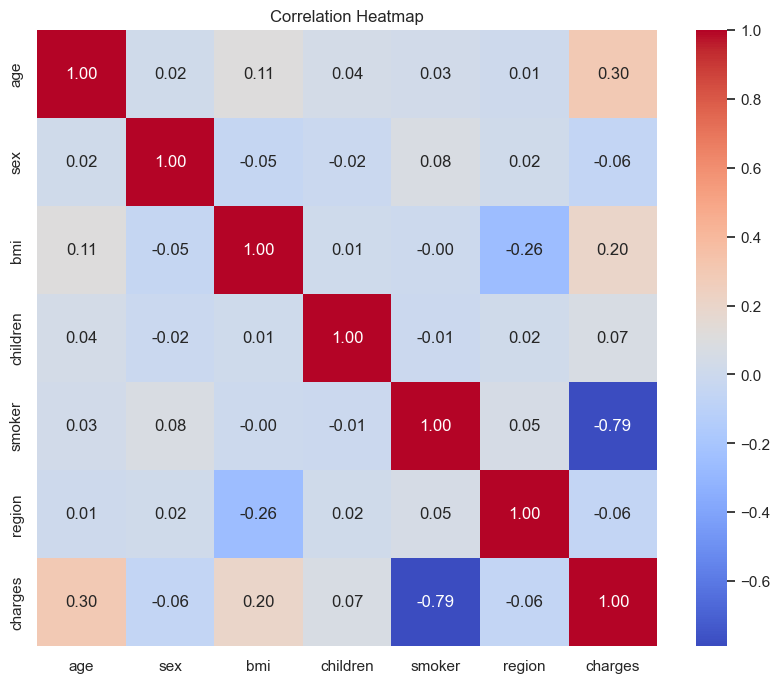

In [13]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### this is a correlation heatmap we will how our data is correlated to our model  
1. Age , bmi and children are correlated to the   charges alook those are the only numerical features we had 
2. When we shift to the non-numerical features the ones we have ecoded (sex,smoker , region) all tend to have an inverse correlation to our data at this point we cannot actually determine which columns to get rid off in fear of reducing complexity and diensionality

We will determine our X columns and y columns and then we would fit our model 

In [14]:
# for the below code we will  be dropping the cahrges colum as we will be using it as our target data (Y)
X =df.drop(columns='charges',axis =1)
y =df['charges']

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

### We will fit our random regressor model and help determine the Mean absolute error and the r2 score of  our random regressor  each using of the test amd train data 

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Create the Random Forest regressor
rf_regressor = RandomForestRegressor()

# Fit the model on the training data
rf_regressor.fit(X_train, y_train)

# Predict on the training and test data
y_train_pred = rf_regressor.predict(X_train)
y_test_pred = rf_regressor.predict(X_test)

# Calculate the Mean Absolute Error (MAE) for training and test data
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
print("Train MAE:", mae_train)
print("Test MAE:", mae_test)

# Calculate the R-squared (R2) scores for training and test data
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print("Train R2 Score:", r2_train)
print("Test R2 Score:", r2_test)

Train MAE: 1013.462651516981
Test MAE: 2728.2352722939927
Train R2 Score: 0.977056880589153
Test R2 Score: 0.8361849577336108


# The model is definitely overfitting as we compare the r2 score of the train and test data to reduce the overfitting we will have to introduce parameters to tweak our model and train it  the parameters include
n_estimators: The number of decision trees in the forest. Increasing the number of estimators can improve the performance, but it also increases the computation time and memory requirements.

max_depth: The maximum depth of each decision tree in the forest. It determines the maximum number of levels in the decision tree. Setting a higher value can allow the model to capture more complex relationships in the data, but it can also lead to overfitting.

min_samples_split: The minimum number of samples required to split an internal node. It controls how the decision tree is built by specifying the minimum number of samples required to make a further split. A higher value can prevent overfitting, but it can also lead to underfitting if set too high.

min_samples_leaf: The minimum number of samples required to be at a leaf node. It specifies the minimum number of samples required to form a leaf node. Similar to min_samples_split, a higher value can prevent overfitting, but it can also lead to underfitting.

max_features: The number of features to consider when looking for the best split. It determines the maximum number of features to consider at each split. The "auto" option uses the square root of the total number of features, while "sqrt" and "log2" options use the square root and logarithm of the total number of features, respectively. Additionally, an integer value can be used to specify the exact number of features to consider.

random_state: The seed used by the random number generator for randomizing the dataset and the forest construction. Setting a specific value ensures reproducibility of the model.

In [17]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



# Step 5: Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Step 6: Perform grid search to find the best hyperparameters
model = RandomForestRegressor()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Step 7: Train the Random Forest model with the best hyperparameters
best_model = RandomForestRegressor(**best_params)
best_model.fit(X_train, y_train)

# Step 8: Model evaluation
# Predict on training set and calculate metrics
y_train_pred = best_model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
print("Train Mean Squared Error:", mse_train)
print("Train Mean Absolute Error:", mae_train)
print("Train R-squared:", r2_train)

# Predict on test set and calculate metrics
y_test_pred = best_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
print("Test Mean Squared Error:", mse_test)
print("Test Mean Absolute Error:", mae_test)
print("Test R-squared:", r2_test)


Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Train Mean Squared Error: 16613699.474856827
Train Mean Absolute Error: 2250.0180536616126
Train R-squared: 0.8858766268545215
Test Mean Squared Error: 19305881.42556222
Test Mean Absolute Error: 2344.194149954075
Test R-squared: 0.871449037833803


In [18]:
input_data=(18,0,33.770,1,1,0)
input_array=np.array(input_data)
input_data_reshaped=input_array.reshape(1,-1)
prediction=best_model.predict(input_data_reshaped)
print('The insurance cost is USD  ',prediction)

The insurance cost is USD   [4225.94816469]


c:\Users\stilinski\Downloads\mlmodels\venv\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [19]:
 best_model.predict(df.iloc[[1], 1:].values)


c:\Users\stilinski\Downloads\mlmodels\venv\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([14928.7868305])

In [20]:
import pickle

In [21]:
pickle.dump(best_model,open('regmodel.pkl','wb'))

### We have impelemented  a grid search cv to look for the best params for our data and used the best params to actually  tune our moddel to draw meaningful insights from our data  and we can see that we have reduced our overfitting and catually the r2 for both the test and train method are almost similar thus chances of overfitting are very low

### We will now look at the feature importance and look for the most important columns that actually impact our RandomForest Regressor

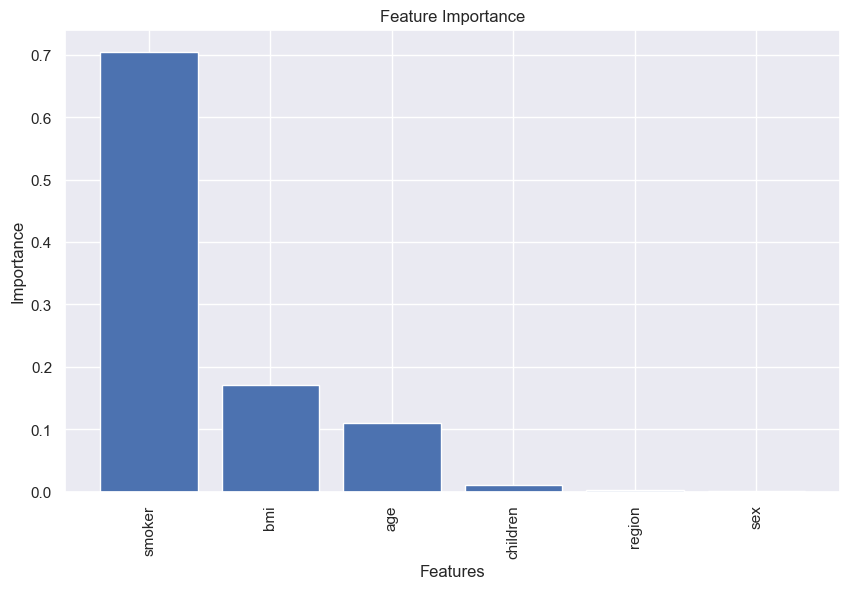

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already trained the RandomForestRegressor model and stored it in 'best_model'

# Get feature importances from the trained model
importances = best_model.feature_importances_

# Create a DataFrame with feature names and their importances
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importances['Feature'], feature_importances['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

## From the results we can actually see that 
## 1. Smokers actually atrreact a higher insurance premiums charge and it sffeacts most
## 2. BMI - the higher the BMI thus the higher the the insurance premium one is charged 
## 3. Age - the older one gets thus the higher the insurance preiumns one is charged 
## 4. Children - one with  a higher number of children is likely to be  charged more 
   ## These factors are directly and widely predictable even to someone who has acually not seen our data .Though its very important for us to determine the extant to which each variable affects our data.
## 5 . region and sex do not actually affect the prediction o our data an  thus important while delaing with future customers that we will not cahrge them any differnt amount based on their region and gender.